# Data Science Coronavírus

### Importing Libraries for processing

In [1]:
import pandas as pd
import numpy as np
from datetime import date

### Today's Date

In [2]:
from datetime import date
dia = (date.today())
dia = str(dia)
dia = dia[-2:]
dia = int(dia)
print(dia)

6


### Storing Dataset Links in a List 

In [3]:
# DataBase
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data?fbclid=IwAR1C6Cf_k5bpeEF5v1I9G-OlXeMZd0B1JreUw4ayc5tuOLYVSKvyunFaam8

base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports'
list_links = []
#Getting links for month of January
print("Getting links for month of January")
for c in range(22, 32):
    
    list_links.append(str(base_url+f'/01-{c}-2021.csv'))
print("list_links ", list_links)
#Getting links for month of February
print("Getting links for month of February")
for c in range(1, 29):
    
    if c <= 9:
        list_links.append(str(base_url+f'/02-0{c}-2021.csv'))
    else:
        list_links.append(str(base_url+f'/02-{c}-2021.csv'))
print("list_links ", list_links)
#Getting links for month of March
print("Getting links for month of March")
for c in range(1, 32):
    
    if c <= 9:
        list_links.append(str(base_url+f'/03-0{c}-2021.csv'))
    else:
        list_links.append(str(base_url+f'/03-{c}-2021.csv'))
print("list_links ", list_links)
# Getting links for month of April
print("Getting links for month of April")
for c in range(1,dia):
    if c <= 9:
        list_links.append(str(base_url+f'/04-0{c}-2021.csv'))
    else:
        list_links.append(str(base_url+f'/04-{c}-2021.csv'))
print("list_links ", list_links)

Getting links for month of January
list_links  ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2021.csv', 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2021.csv', 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2021.csv', 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2021.csv', 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2021.csv', 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2021.csv', 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2021.csv', 'https://raw.githubusercontent.com/CSSEGIS

### Converting Links to a Dataframe and Storing in a List

In [4]:
lists = []
for c in list_links:
    df = pd.read_csv(c)
    np.array(df)
    lists.append(df)


### Viewing and describing the data

In [5]:
#We will view a table individually to look at its columns
#lists[60].head()
for c in range(0, len(lists)):
    lists[c].rename(columns = {'Lat':'Latitude'}, inplace = True)
    lists[c].rename(columns = {'Long_':'Longitude'}, inplace = True)
lists[39]['Latitude'].head()

0    33.93911
1    41.15330
2    28.03390
3    42.50630
4   -11.20270
Name: Latitude, dtype: float64

In [6]:
print(len(lists))
lists[0].info()


74
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3812 non-null   object 
 3   Country_Region       3983 non-null   object 
 4   Last_Update          3983 non-null   object 
 5   Latitude             3895 non-null   float64
 6   Longitude            3895 non-null   float64
 7   Confirmed            3983 non-null   int64  
 8   Deaths               3983 non-null   int64  
 9   Recovered            3983 non-null   int64  
 10  Active               3981 non-null   float64
 11  Combined_Key         3983 non-null   object 
 12  Incident_Rate        3893 non-null   float64
 13  Case_Fatality_Ratio  3940 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 435.8+ KB


In [7]:
round(lists[0].describe(),2)

FIPS  Latitude  ...  Incident_Rate  Case_Fatality_Ratio
count   3266.00   3895.00  ...        3893.00              3940.00
mean   32401.27     35.99  ...        6837.73                 1.94
std    18033.81     13.02  ...        3540.18                 4.40
min       66.00    -52.37  ...           0.00                 0.00
25%    19049.50     33.27  ...        4503.45                 1.02
50%    30068.00     37.95  ...        7137.28                 1.59
75%    47040.50     42.22  ...        9133.71                 2.34
max    99999.00     71.71  ...       29071.11               188.71

[8 rows x 9 columns]

### Creating the Lists that will be used to plot the graph

In [8]:
lists_Dead = []
lists_Confirmed_cases = []
lists_Recovered = []

for c in range(0,len(lists)):
    lists_Dead.append((lists[c]['Deaths']).sum())
    lists_Confirmed_cases.append((lists[c]['Confirmed']).sum())
    lists_Recovered.append((lists[c]['Recovered']).sum())

### Plotting the Graph

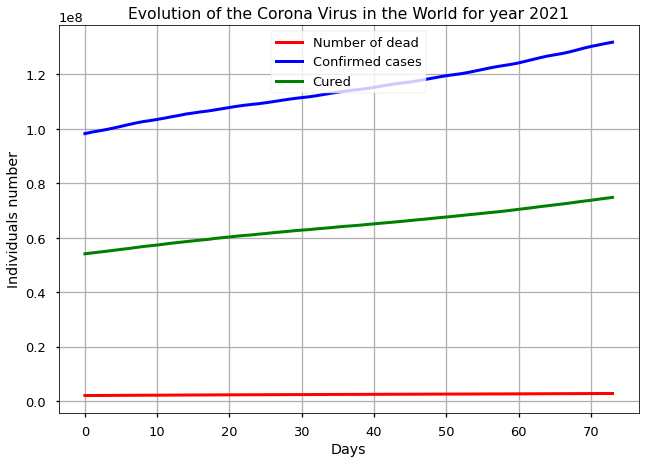

In [9]:
import matplotlib.pyplot as plt
x = [i for i in range(0, len(lists_Dead))]
plt.style.use('seaborn-talk')
y_Dead = lists_Dead
y_Confirmed_cases = lists_Confirmed_cases
y_Recovered = lists_Recovered
plt.plot(x, y_Dead, color='red', label='Number of dead', linewidth=3.0)
plt.plot(x, y_Confirmed_cases, color='blue', label='Confirmed cases', linewidth=3.0)
plt.plot(x, y_Recovered, color='green', label='Cured', linewidth=3.0)
plt.xlabel('Days')
plt.ylabel('Individuals number')
plt.title('Evolution of the Corona Virus in the World for year 2021')
#fig = plt.gcf()
#fig.set_size_inches(10, 8)
plt.grid(True)
plt.legend(loc='upper center')
plt.savefig('corona.png')
plt.show()


### Creating another Dataframe with the most current data

In [10]:
current_data = {'Number of dead':y_Dead[len(y_Dead)-1],
                'Confirmed cases':y_Confirmed_cases[len(y_Confirmed_cases)-1],
                'Cured':y_Recovered[len(y_Recovered)-1]}
current_data

{'Confirmed cases': 131815052, 'Cured': 74846290.0, 'Number of dead': 2861063}

In [11]:
current_data = pd.DataFrame([current_data])

In [12]:
current_data

Number of dead  Confirmed cases       Cured
0         2861063        131815052  74846290.0

### Calculating the Virus Mortality Rate

In [13]:
#Virus Mortality Rate
current_data['Mortality Rate(%)'] = (current_data['Number of dead']/current_data['Confirmed cases'])*100
current_data

Number of dead  Confirmed cases       Cured  Mortality Rate(%)
0         2861063        131815052  74846290.0           2.170513

### Creating a Heat Map with some places affected by the Virus

In [15]:
#!pip install folium
import folium
import math
from folium.plugins import HeatMap
#from folium import heat_map


maps = folium.Map(location=[10,10],zoom_start=1.5,tiles='Stamen Toner')
location = []

for c in range(39, len(lists)):
    for lat,lon in zip(lists[c]['Latitude'], lists[c]['Longitude']):
        if math.isnan(lat) == True or math.isnan(lon) == True:
            pass
        else:
            temp = [lat,lon]
            location.append(temp)


HeatMap(location, radius=16).add_to(maps)
maps.save('corona_maps.html')

In [16]:
maps